* Gender — пол пассажира (женский, мужской);
* Customer Type — тип клиента (постоянный/непостоянный клиент);
* Age — возраст клиента;
* Type of Travel — цель перелета (личная/деловая поездка);
* Class — туристический класс пассажира (Business, Eco, Eco Plus);
* Flight distance — расстояние полета;
* Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);
* Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;
* Ease of Online booking — уровень удовлетворённости онлайн-бронированием;
* Gate location — уровень удовлетворённости расположением выхода на посадку;
* Food and drink — уровень удовлетворённости едой и напитками;
* Online boarding — уровень удовлетворённости онлайн-регистрацией;
* Seat comfort — уровень удовлетворённости комфортом сидений;
* Inflight entertainment — уровень удовлетворённости развлечениями на борту;
* On-board service — уровень удовлетворённости сервисом на борту;
* Leg room service — уровень удовлетворённости местом для ног;
* Baggage handling — уровень удовлетворённости обработкой багажа;
* Check-in service — уровень удовлетворённости услугами регистрации;
* Inflight service — уровень удовлетворённости обслуживанием во время полёта;
* Cleanliness — уровень удовлетворённости чистотой;
* Departure Delay in Minutes — задержка при отправлении (в минутах);
* Arrival Delay in Minutes — задержка при прибытии (в минутах);
* Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

In [16]:
# !pip install xgboost
# !pip install catboost

In [65]:
import pandas as pd
import numpy as np
# # Графика
import matplotlib.pyplot as plt
import seaborn as sns
# Деление выборки
from sklearn import model_selection

from sklearn import preprocessing #предобработка данных
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble # онсамбли

from sklearn.metrics import f1_score #метрики

In [5]:
Air_data = pd.read_csv('../../data/AirPass.csv',index_col='Unnamed: 0')
Air_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
# Air_data.info()

### Задание 6.1
Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?

In [11]:
print(Air_data.isnull().sum().sum(),': суммарно пропусков в данных')

310 : суммарно пропусков в данных


In [13]:
# Air_data.isnull().sum()

### Задание 6.2
Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [15]:
# Arrival Delay in Minutes
Air_data['Arrival Delay in Minutes'] = Air_data['Arrival Delay in Minutes'].fillna(Air_data['Arrival Delay in Minutes'].median())
round(Air_data['Arrival Delay in Minutes'].mean(),2)

15.13

### Задание 6.3
Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

In [20]:
# Air_data['satisfaction'].value_counts()
# neutral or dissatisfied    58879   нейтральный или недовольный
# satisfied                  45025   удовлетворенный

#### 1. Сравните удовлетворённость полётом мужчин и женщин. Выберите верное утверждение:

Gender,Female,Male
satisfaction,,
neutral or dissatisfied,30193,28686
satisfied,22534,22491


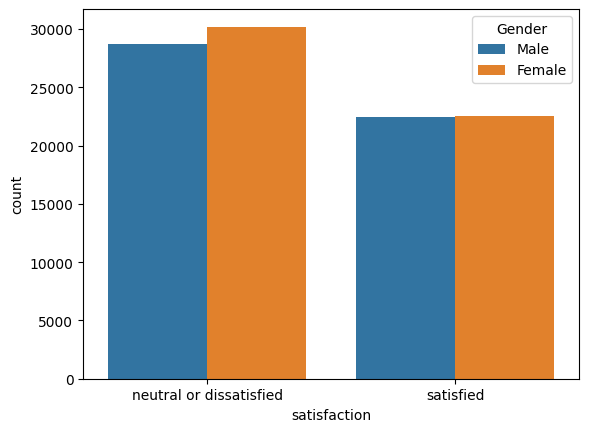

In [34]:
temp=Air_data.groupby('satisfaction')['Gender'].value_counts()

temp=Air_data.pivot_table(index ='satisfaction',columns ='Gender', values ='id',aggfunc ='count')
display(temp)
sns.countplot(data=Air_data, x='satisfaction', hue ='Gender');

#### 2. Теперь сравним категории пассажиров в зависимости от их цели поездки. Выберите все верные утверждения:

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29909,28970
satisfied,41746,3279


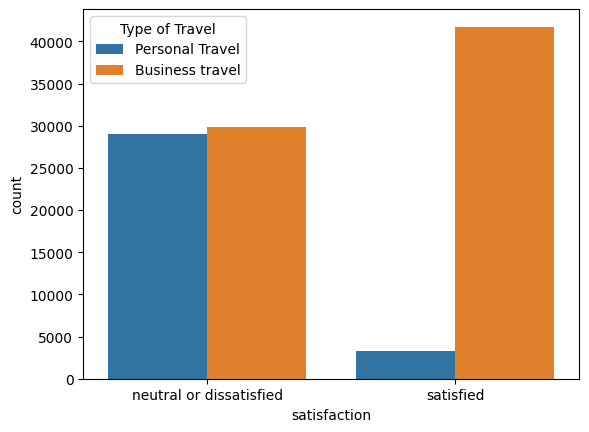

In [35]:
temp=Air_data.pivot_table(index ='satisfaction',columns ='Type of Travel', values ='id',aggfunc ='count')
display(temp)
sns.countplot(data=Air_data, x='satisfaction', hue ='Type of Travel');
# Business travel  Деловые поездки
# Personal Travel  Личные поездки

#### 3. В каком туристическом классе наибольший процент довольных клиентов?

Class,Business,Eco,Eco Plus
satisfaction,,,
neutral or dissatisfied,15185,38044,5650
satisfied,34480,8701,1844


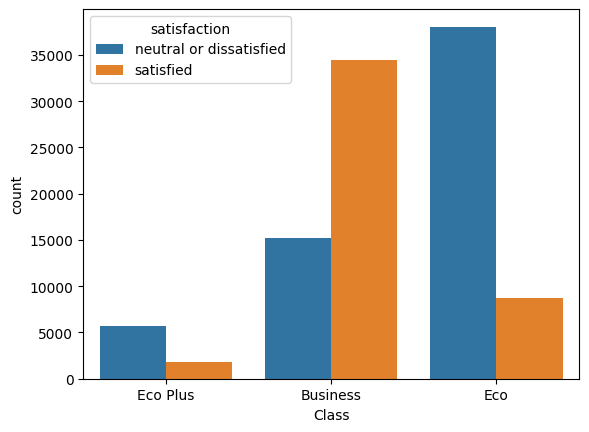

In [37]:
temp=Air_data.pivot_table(index ='satisfaction',columns ='Class', values ='id',aggfunc ='count')
display(temp)
sns.countplot(data=Air_data, hue ='satisfaction', x ='Class');

In [38]:
Air_data['satisfaction'] = Air_data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
Air_data['Customer Type'] = Air_data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
Air_data['Type of Travel'] = Air_data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
Air_data['Gender'] = Air_data['Gender'].map({'Male': 0, 'Female': 1})

### Задание 6.4
Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [45]:
Air_data=pd.get_dummies(Air_data, columns=['Class'], prefix_sep='_')# columns=['Class'],
print(Air_data.shape[1], ' теперь признаков в данных')

26  теперь признаков в данных


### Задание 6.5
Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [48]:
X = Air_data.drop('satisfaction', axis=1)
y = Air_data['satisfaction']
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=26) # , stratify=y
print(y_test.shape[0],' наблюдений попало в тестовую выборку')

20781  наблюдений попало в тестовую выборку


### Задание 6.6
Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

>Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось. Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты.

В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя.

In [56]:
# StandardScaler подходит для нормально распределённых данных. Он сохраняет исходное распределение и не меняет форму, но чувствителен к выбросам и не подходит для данных с негауссовским распределением. 1
# MinMaxScaler масштабирует признаки в заданный диапазон, сохраняя взаимосвязи. Он не искажает исходное распределение, но чувствителен к выбросам и не эффективно обрабатывает данные с крайними выбросами. 1
# RobustScaler эффективно работает с данными с выбросами. 14 Для масштабирования он использует медиану и межквартильный диапазон, что позволяет обрабатывать признаки с большим количеством выбросов без влияния на них.
# Так как имеются выбросы применим RobustScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
display(scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Параметры выборки после трансформации')
print(round(X_test_scaled[0,0],2), ' самое первое значение из матрицы преобразованных признаков тестовой выборки')

StandardScaler()

Параметры выборки после трансформации
0.94  самое первое значение из матрицы преобразованных признаков тестовой выборки


### Задание 6.7
Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [59]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression()
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)
y_test_pred = log_reg.predict(X_train_scaled)
acc_le=f1_score(y_train, y_test_pred)
print('f1_score на Test: {:.3f}'.format(acc_le))

y_test_pred = log_reg.predict(X_test_scaled)
acc_le=f1_score(y_test, y_test_pred)
print('f1_score на Test: {:.3f}'.format(acc_le))

f1_score на Test: 0.854
f1_score на Test: 0.855


### Задание 6.8
Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [64]:
#Создаем объект класса AdaBoost
eABC = ensemble.AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(random_state=26),
                                   learning_rate=0.01,
                                   random_state=26)
#Обучаем модель, минимизируя AdaBoost
eABC.fit(X_train_scaled, y_train)
y_test_pred = eABC.predict(X_train_scaled)
acc_le=f1_score(y_train, y_test_pred)
print('f1_score на Test: {:.3f}'.format(acc_le))

y_test_pred = eABC.predict(X_test_scaled)
acc_le=f1_score(y_test, y_test_pred)
print('f1_score на Test: {:.3f}'.format(acc_le))

f1_score на Test: 1.000
f1_score на Test: 0.940


### Задание 6.9
Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.

Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

>Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных.

In [ ]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}